In [498]:
import matplotlib.gridspec as gridspec
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal import find_peaks,argrelextrema
from datetime import date
from numpy.polynomial.polynomial import polyval
from matplotlib import cm,colors,ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use("/Users/kipp/Plotting/custom_style.mplstyle")
d = date.isoformat(date.today())
v = 0
def format_func(value, tick_number):
    if abs(value) <= 10**(-4) and abs(value)!= 0.0:
        return("{:.2E}".format(value))
    else:
        return("{:1.4f}".format(value))
def hc_fin_func(hc,hc_opp,hc_sym):
    if hc_sym == 'sym':
        hc_fin = (hc + hc_opp)/2
    elif hc_sym == 'antisym':
        hc_fin = (hc - hc_opp)/2
    elif hc_sym == 'bare':
        hc_fin = hc
    return(hc_fin)
def col_type_func(m_theta,case):
        #CASE == 0: THETA1=-THETA2 = THETA_NC
        #CASE == 1: THETA1= 0, THETA2 = +/- THETA_NC
        #CASE == 2: THETA1= 0/THETA_NC, THETA2 = THETA_NC/0
        #CASE == 3: THETA1 = +/-THETA_NC THETA2 = -/+THETA_NC
        #IN DEGREES
    if case == 0:
        theta_nc = (m_theta[0] - m_theta[1])/2
        theta_col = (m_theta[0] + m_theta[1])/2
    elif case == 1:
        theta_nc = m_theta[0] - m_theta[1]
        theta_col = m_theta[0]
    elif case == 2:
        theta_nc = m_theta[0] - m_theta[1]
        theta_col = (m_theta[0]+m_theta[1])/2 - theta_nc/2
    elif case == 3:
        theta_nc = (m_theta[0] - m_theta[1])/2
        theta_col = (m_theta[0] + m_theta[1])/2
    return(180./np.pi*theta_col,abs(180./np.pi*theta_nc))
def setup_check(keyword,prefix,fname):
    pattern = keyword + "\s*=\s*['a-z]+|" + keyword + "\s*=\s*(\d+(.\d*)+(.\d*)E\+\d\d)|" + keyword + "\s*=\s*"
    with open(prefix + fname + '/setup.cfg','r') as fin:
        for num,line in enumerate(fin,1):
            s = re.search(pattern,line)
            if s!=None:
                if s.group(2)!=None:
                    val = float(s.group(1))
    return(val)
datesets = ["20190423","20190424","20190425","20190517","20190606","20190611","20190612"]
prefixsold = ["/Users/kipp/STB/output_jureca/" + d + "/" for d in datesets]
prefixs = ["/Data/ias-1/kipp/" + d + "/" for d in datesets]
save_prefix = "/Users/kipp/STB/weyl_figures/Weyl_figures/"
coltypes = ['col','noncol']
func_col_types = [1,0,2,3,2,2]
hc_syms = ['sym','antisym']
K_label = ["","$\Gamma$", "$K^{'}$", "K", "$\Gamma$"]
findbool = False
key = 'anticol_theta'
rotation = 'scancol'
rotation2 = 'scancolflip'
seedfname = "path_rel_G-K-Kprime"
save_strs = ["datafrom_" + ds for ds in datesets]
inputname = seedfname + '_' + key + '_' + rotation
inputname2 = seedfname + '_' + key + '_' + rotation2
files = 51
j = 0
peakexp = 3
symdict = {'sym':0,'antisym':files//2}
symstringdict = {'sym': 'symmetric','antisym':'antisymmetric'}
colthetalabeldict = {'col':'$\Theta_{col}$ [deg.]','noncol':'$\Theta_{nc}$ [deg.]'}
coltypesdict = dict(list(zip(datesets,func_col_types)))
symhclabeldict = {'sym':r'$\sigma_{sym,xy}$ [$\frac{e^2}{h}$]','antisym':r'$\sigma_{asym,xy}$ [$\frac{e^2}{h}$]','bare':r"$\sigma_{xy}$ [$\frac{e^2}{h}$]"}
labeldict = {'pwd':r"$\frac{\Delta\sigma}{\Delta\Theta}$",'peak':"$\sigma$"}
factordict = {'m_theta':180./np.pi,'lambda':1.,'t_so':1.}

In [ ]:
norm = colors.Normalize(vmin = 0, vmax = 20)
lims1 = [-0.5,0.5]
lims2 = [-3.2,-2.8]
lims3 = [2.8,3.2]
lims = [lims1,lims2,lims3]
zoom_lims = [2.94,3.01]
m,n,o = 1,6,18
#j,k,l = 
prefix2 = prefixs[1]
prefix = prefixs[6]
dateset = datesets[6]
#inputname = "test_lambda_tso"
#inputname2 = "test_lambda_tsoflip"
#inputname_null = "test_lambda_tso_col"
#inputname_null = "path_rel_G-K-Kprime_anticol_theta_scananticol_00_lambda_02_t_so_01"
j = 0
inputname_null = "path_rel_G-K-Kprime_anticol_theta_col_{:02}".format(j)
inputname = "path_rel_G-K-Kprime_anticol_theta_scancol_{:02}".format(j)
inputname2 = "path_rel_G-K-Kprime_anticol_theta_scancolflip_{:02}".format(j)
#inputname = "path_rel_G-K-Kprime_anticol_theta_scancol_{}".format(24)
#inputname2 = "path_rel_G-K-Kprime_anticol_theta_scancol_{}".format(24)
#inputname = "path_rel_G-K-Kprime_inplane_fm_3"
#inputname2 = "path_rel_G-K-Kprime_inplane_fm_3_flip"
#inputname = "path_rel_G-K-Kprime_anticol_theta_scananticol_{:02}_lambda_{:02}_t_so_{:02}".format(j,k,l)
#inputname2 = "path_rel_G-K-Kprime_anticol_theta_scananticolflip_{:02}_lambda_{:02}_t_so_{:02}".format(j,k,l)
colmap = 'jet'
#inputname = "test_tso_lambda"
#inputname2 = "test_tso_lambdaflip"
#inputname_null = "test_tso_lambda_col"
E_sq = np.load(prefix + inputname + '/band_E.npy')
E_null_sq = np.load(prefix + inputname_null + '/band_E.npy')
E_opp_sq = np.load(prefix + inputname2 + '/band_E.npy')


E = reshape_func(3200,1600,E_sq,4)
E_null = reshape_func(3200,1600,E_null_sq,4)
E_opp = reshape_func(3200,1600,E_opp_sq,4)

hc = np.load(prefix + inputname + '/hall_cond.npy')
hc_opp = np.load(prefix + inputname2 + '/hall_cond.npy')
hc_null = np.load(prefix + inputname_null + '/hall_cond.npy')
hc_E = np.load(prefix + inputname + '/hall_cond_E.npy')

m_theta = np.load(prefix + inputname + '/m_theta.npy')
m_theta_opp = np.load(prefix + inputname2 + '/m_theta.npy')
m_theta_null = np.load(prefix + inputname_null + '/m_theta.npy')
print(m_theta,m_theta_opp,m_theta_null)
theta_col,theta_nc = col_type_func(m_theta,coltypesdict[datesets[2]])
dx = np.sin(m_theta)
dz = np.cos(m_theta)
dx_opp = np.sin(m_theta_opp)
dz_opp = np.cos(m_theta_opp)
dx_col = np.sin(m_theta_null)
dz_col = np.cos(m_theta_null)

lmda = setup_check('lambda',prefix,inputname + '/')
lmda_null = setup_check('lambda',prefix,inputname_null + '/')
print(lmda,lmda_null)
t_so = setup_check('t_so',prefix,inputname + '/')
t_so_null = setup_check('t_so',prefix,inputname_null + '/')
print(t_so,t_so_null)
temperature = setup_check('temperature',prefix,inputname + '/')
thetastr = "$\Theta_{cant}$" + " = {:1.2f} deg.".format(theta_nc) + "\n$\Theta_{col}$" + " = {:1.2f} deg.".format(theta_col)
lambdastr = "$\lambda_{xc}$" + " = {0:1.2f}".format(lmda)
t_sostr = "$t_{so}$" + " = {0:1.2f}".format(t_so)
temperaturestr = "$temperature$" + " = {0:1.2f} K".format(temperature)
textstr = thetastr + "\n" + temperaturestr + "\n" + lambdastr + "\n" + t_sostr

npoints_E = E.shape[1]
K = np.arange(npoints_E)

        ###

fig, ax = plt.subplots(nrows = 2, ncols = 3,figsize = (3*6.4,2*4.8),constrained_layout = True,sharey = 'row')
fig2,ax2 = plt.subplots(nrows = 2, ncols = 3,figsize = (3*6.4,2*4.8),constrained_layout = True,sharey = 'row')
fig3,ax3 = plt.subplots(nrows = 2, ncols = 3,figsize = (3*6.4,2*4.8),constrained_layout = True,sharey = 'row')
for axes in [ax[0,0],ax2[0,0],ax3[0,0],ax[1,0],ax2[1,0],ax3[1,0]]:
    #axes.tick_params(labelsize = 18)
    axes.plot(K,E[0],color =cm.get_cmap(colmap)(norm(m)),label = "$E(+\Theta_{nc})$")
    axes.plot(K,E_null[0],color =cm.get_cmap(colmap)(norm(n)),label = "$E(0)$")
    axes.plot(K,E_opp[0],color =cm.get_cmap(colmap)(norm(o)),label = "$E(-\Theta_{nc})$")
    axes.xaxis.set_major_locator(plt.MultipleLocator(npoints_E//3))
    axes.set_xticklabels(K_label)
    axes.legend(fontsize = 18)
    axes.set_ylabel("Energy [eV]",fontsize = 18)
    axes.margins(x=0, y=-0.0)
    #ax[0,0].legend(fontsize = 18)
for j in range(1,4):
    for axes in [ax[0,0],ax2[0,0],ax3[0,0],ax[1,0],ax2[1,0],ax3[1,0]]:
        axes.plot(K,E[j],color =cm.get_cmap(colmap)(norm(m)))
        axes.plot(K,E_opp[j],color =cm.get_cmap(colmap)(norm(n)))
        axes.plot(K,E_null[j],color =cm.get_cmap(colmap)(norm(o)))
for num,axes in enumerate([ax[1,0],ax2[1,0],ax3[1,0]]):
    print(lims[num])
    axes.set_ylim(lims[num])
for num,axes in enumerate([ax[1,1],ax2[1,1],ax3[1,1]]):
    #print(lims[num])
    axes.set_ylim(zoomlims)
for num,axes in enumerate([ax[0,1],ax2[0,1],ax3[0,1]]):
    #axes.axhspan(ymin = lims[num][0], ymax = lims[num][1],facecolor = "b",alpha = 0.1)
    axes.set_ylim(lims[num])
for num,axes in enumerate([ax[0,0],ax2[0,0],ax3[0,0]]):
    axes.axhspan(ymin = lims[num][0], ymax = lims[num][1],facecolor = "b",alpha = 0.1)
#ax2[1,0].set_ylim(lims2)
#ax3[1,0].set_ylim(lims3)
for axes in [ax[0,1],ax[1,1],ax2[0,1],ax2[1,1],ax3[0,1],ax3[1,1]]:
    axes.plot(hc_fin_func(hc,hc_opp,"antisym"),hc_E,color =cm.get_cmap(colmap)(norm(m)))
    axes.set_xlabel(symhclabeldict["antisym"],fontsize = 18)
    axes.xaxis.set_major_locator(plt.MaxNLocator(3))
    #axes.set_ylabel("Energy [eV]",fontsize = 18)
    #axes.xaxis.set_major_formatter(plt.FuncFormatter(format_func)
    axes.tick_params(labelsize = 18)

for axes in [ax[1,2],ax2[1,2],ax3[1,2]]:
    axes.set_axis_off()
    
for axes in [ax[0,2],ax2[0,2],ax3[0,2]]:
    axes.set_axis_off()
    ylims = axes.get_ylim()
    xlims = axes.get_xlim()
    axins = inset_axes(axes, width=2.6, height=1.8,loc = 'upper right')
    axins.tick_params(tick1On = False,labelleft=False, labelbottom=False)
    axins.set_xlim(-1.8,2.8)
    axins.set_ylim(-1.2,1.2)
    axins.arrow(1.65, 0, dx_col[1],dz_col[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(n)))
    axins.arrow(-0.65, 0, dx_col[0],dz_col[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(n)))
    axins.arrow(1.65, 0, dx[1],dz[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(m)))
    axins.arrow(-0.65, 0, dx[0],dz[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(m)))
    axins.arrow(1.65, 0, dx_opp[1],dz_opp[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
    axins.arrow(-0.65, 0, dx_opp[0],dz_opp[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
    axes.text(xlims[0], ylims[0], textstr,size = 18,
                 horizontalalignment='left',
                 verticalalignment='bottom')
for axes in [ax[1,2],ax2[1,2],ax3[1,2]]:
    ylims = axes.get_ylim()
    xlims = axes.get_xlim()
    inputnamedummy = inputname
    newmatch = re.search('lambda',inputname)
    newmatch2 = re.search('scan',inputname)
    newmatch3 = re.search('col',inputname)
    string = ''
    if newmatch!= None:
        string = string + inputname[newmatch.start():newmatch.end()]
    if newmatch2!= None:
        string = string + "_" + inputname[newmatch2.start():]
    elif newmatch2 == None:
        while newmatch3!=None:
            newmatch3 = re.search('col',inputnamedummy)
            if newmatch3!=None:
                inputnamedummy = inputnamedummy[newmatch3.end():]
        string = string + '_col_' + inputnamedummy 
    string = "Data from: " + dateset + "/.." + string
    axes.text(xlims[0], ylims[0],string,size = 18,
            horizontalalignment='left',
            verticalalignment='bottom',wrap = 'True')
for num,figg in enumerate([fig3]):
    with PdfPages(save_prefix + d + '_' + str(num) + '_' + inputname + '_' + 'bandscompare.pdf') as pdf:
        pdf.savefig(figg)

(array([2.2689, 2.0944]), array([2.0944, 2.2689]), array([2.0944, 2.0944]))
(0.4, 0.4)
(1.4, 1.4)


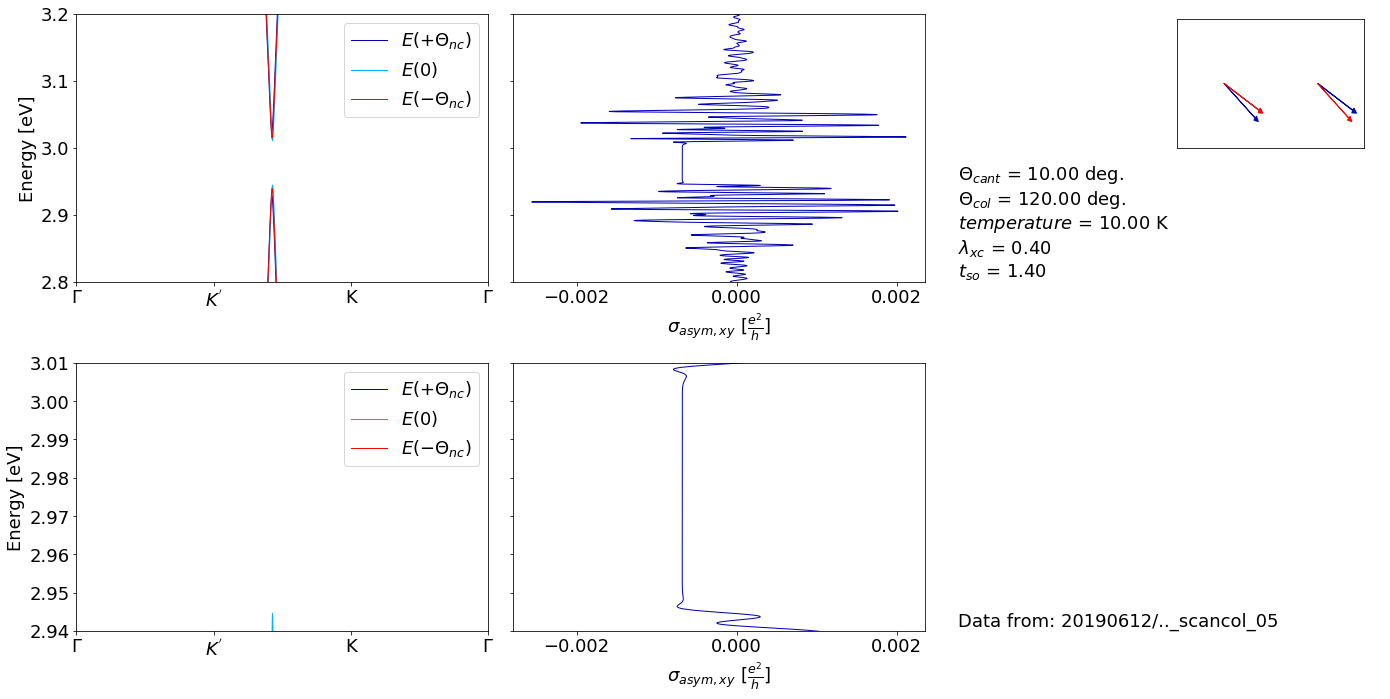

In [527]:

norm = colors.Normalize(vmin = 0, vmax = 20)
lims = [2.8,3.2]
zoomlims = [2.94,3.01]

m,n,o = 1,6,18
#j,k,l = 
prefix2 = prefixs[1]
prefix = prefixs[6]
dateset = datesets[6]
#inputname = "test_lambda_tso"
#inputname2 = "test_lambda_tsoflip"
#inputname_null = "test_lambda_tso_col"
#inputname_null = "path_rel_G-K-Kprime_anticol_theta_scananticol_00_lambda_02_t_so_01"
j = 5
inputname_null = "path_rel_G-K-Kprime_anticol_theta_col_{:02}".format(j)
inputname = "path_rel_G-K-Kprime_anticol_theta_scancol_{:02}".format(j)
inputname2 = "path_rel_G-K-Kprime_anticol_theta_scancolflip_{:02}".format(j)
#inputname = "path_rel_G-K-Kprime_anticol_theta_scancol_{}".format(24)
#inputname2 = "path_rel_G-K-Kprime_anticol_theta_scancol_{}".format(24)
#inputname = "path_rel_G-K-Kprime_inplane_fm_3"
#inputname2 = "path_rel_G-K-Kprime_inplane_fm_3_flip"
#inputname = "path_rel_G-K-Kprime_anticol_theta_scananticol_{:02}_lambda_{:02}_t_so_{:02}".format(j,k,l)
#inputname2 = "path_rel_G-K-Kprime_anticol_theta_scananticolflip_{:02}_lambda_{:02}_t_so_{:02}".format(j,k,l)
colmap = 'jet'
#inputname = "test_tso_lambda"
#inputname2 = "test_tso_lambdaflip"
#inputname_null = "test_tso_lambda_col"
E_sq = np.load(prefix + inputname + '/band_E.npy')
E_null_sq = np.load(prefix + inputname_null + '/band_E.npy')
E_opp_sq = np.load(prefix + inputname2 + '/band_E.npy')


E = reshape_func(3200,1600,E_sq,4)
E_null = reshape_func(3200,1600,E_null_sq,4)
E_opp = reshape_func(3200,1600,E_opp_sq,4)

hc = np.load(prefix + inputname + '/hall_cond.npy')
hc_opp = np.load(prefix + inputname2 + '/hall_cond.npy')
hc_null = np.load(prefix + inputname_null + '/hall_cond.npy')
hc_E = np.load(prefix + inputname + '/hall_cond_E.npy')

m_theta = np.load(prefix + inputname + '/m_theta.npy')
m_theta_opp = np.load(prefix + inputname2 + '/m_theta.npy')
m_theta_null = np.load(prefix + inputname_null + '/m_theta.npy')
print(m_theta,m_theta_opp,m_theta_null)
theta_col,theta_nc = col_type_func(m_theta,coltypesdict[datesets[2]])
dx = np.sin(m_theta)
dz = np.cos(m_theta)
dx_opp = np.sin(m_theta_opp)
dz_opp = np.cos(m_theta_opp)
dx_col = np.sin(m_theta_null)
dz_col = np.cos(m_theta_null)

lmda = setup_check('lambda',prefix,inputname + '/')
lmda_null = setup_check('lambda',prefix,inputname_null + '/')
print(lmda,lmda_null)
t_so = setup_check('t_so',prefix,inputname + '/')
t_so_null = setup_check('t_so',prefix,inputname_null + '/')
print(t_so,t_so_null)
temperature = setup_check('temperature',prefix,inputname + '/')
thetastr = "$\Theta_{cant}$" + " = {:1.2f} deg.".format(theta_nc) + "\n$\Theta_{col}$" + " = {:1.2f} deg.".format(theta_col)
lambdastr = "$\lambda_{xc}$" + " = {0:1.2f}".format(lmda)
t_sostr = "$t_{so}$" + " = {0:1.2f}".format(t_so)
temperaturestr = "$temperature$" + " = {0:1.2f} K".format(temperature)
textstr = thetastr + "\n" + temperaturestr + "\n" + lambdastr + "\n" + t_sostr

npoints_E = E.shape[1]
K = np.arange(npoints_E)


fig,ax = plt.subplots(nrows = 2, ncols = 3,figsize = (3*6.4,2*4.8),constrained_layout = True,sharey = 'row')
for axes in [ax[0,0],ax[1,0]]:
    axes.plot(K,E[0],color =cm.get_cmap(colmap)(norm(m)),label = "$E(+\Theta_{nc})$")
    axes.plot(K,E_null[0],color =cm.get_cmap(colmap)(norm(n)),label = "$E(0)$")
    axes.plot(K,E_opp[0],color =cm.get_cmap(colmap)(norm(o)),label = "$E(-\Theta_{nc})$")
    axes.xaxis.set_major_locator(plt.MultipleLocator(npoints_E//3))
    axes.set_xticklabels(K_label)
    axes.legend(fontsize = 18)
    axes.set_ylabel("Energy [eV]",fontsize = 18)
    axes.margins(x=0, y=-0.0)
for j in range(1,4):
    for axes in [ax[0,0],ax[1,0]]:
        axes.plot(K,E[j],color =cm.get_cmap(colmap)(norm(m)))
        axes.plot(K,E_opp[j],color =cm.get_cmap(colmap)(norm(n)))
        axes.plot(K,E_null[j],color =cm.get_cmap(colmap)(norm(o)))

ax[1,0].set_ylim(zoomlims)
ax[0,1].set_ylim(lims)
#ax[0,0].axhspan(ymin = lims[0], ymax = lims[1],facecolor = "b",alpha = 0.1)

for axes in [ax[0,1],ax[1,1]]:
    axes.plot(hc_fin_func(hc,hc_opp,"antisym"),hc_E,color =cm.get_cmap(colmap)(norm(m)))
    axes.set_xlabel(symhclabeldict["antisym"],fontsize = 18)
    axes.xaxis.set_major_locator(plt.MaxNLocator(3))
    axes.tick_params(labelsize = 18)
    
for axes in [ax[0,2]]:
    axes.set_axis_off()
    ylims = axes.get_ylim()
    xlims = axes.get_xlim()
    axins = inset_axes(axes, width=2.6, height=1.8,loc = 'upper right')
    axins.tick_params(tick1On = False,labelleft=False, labelbottom=False)
    axins.set_xlim(-1.8,2.8)
    axins.set_ylim(-1.2,1.2)
    axins.arrow(1.65, 0, dx_col[1],dz_col[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(n)))
    axins.arrow(-0.65, 0, dx_col[0],dz_col[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(n)))
    axins.arrow(1.65, 0, dx[1],dz[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(m)))
    axins.arrow(-0.65, 0, dx[0],dz[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(m)))
    axins.arrow(1.65, 0, dx_opp[1],dz_opp[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
    axins.arrow(-0.65, 0, dx_opp[0],dz_opp[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
    axes.text(xlims[0], ylims[0], textstr,size = 18,
                 horizontalalignment='left',
                 verticalalignment='bottom')
for axes in [ax[1,2]]:
    axes.set_axis_off()
    ylims = axes.get_ylim()
    xlims = axes.get_xlim()
    inputnamedummy = inputname
    newmatch = re.search('lambda',inputname)
    newmatch2 = re.search('scan',inputname)
    newmatch3 = re.search('col',inputname)
    string = ''
    if newmatch!= None:
        string = string + inputname[newmatch.start():newmatch.end()]
    if newmatch2!= None:
        string = string + "_" + inputname[newmatch2.start():]
    elif newmatch2 == None:
        while newmatch3!=None:
            newmatch3 = re.search('col',inputnamedummy)
            if newmatch3!=None:
                inputnamedummy = inputnamedummy[newmatch3.end():]
        string = string + '_col_' + inputnamedummy 
    string = "Data from: " + dateset + "/.." + string
    axes.text(xlims[0], ylims[0],string,size = 18,
            horizontalalignment='left',
            verticalalignment='bottom',wrap = 'True')
with PdfPages(save_prefix + d + '_' + str(num) + '_' + inputname + '_' + 'bandscompare.pdf') as pdf:
    pdf.savefig(fig)

In [33]:
inputname = "path_rel_G-K-Kprime_lambda_anticol_theta_scancolflip_{:02}".format(j)
inputnamedummy = inputname
newmatch = re.search('lambda',inputname)
newmatch2 = re.search('scan',inputname)
newmatch3 = re.search('col',inputname)
string = ''
if newmatch!= None:
    string = string + inputname[newmatch.start():newmatch.end()]
if newmatch2!= None:
    string = string + "_" + inputname[newmatch2.start():]
elif newmatch2 == None:
    while newmatch3!=None:
        newmatch3 = re.search('col',inputnamedummy)
    #print(inputname[newmatch2.start():])
    #print(newmatch2)
        if newmatch3!=None:
            inputnamedummy = inputnamedummy[newmatch3.end():]
    string = string + '_col_' + inputnamedummy 
print(string)

lambda_col_flip_00


In [468]:
def reshape_func(sq1,sq2,E,E_shape):
    x = np.arange(0,1599,2,dtype = 'int')
    y = 1599*np.ones(800,dtype = 'int')
    x2 = 1599 - np.arange(1,801,dtype = 'int') 
    y2 = 1599 + 2*np.arange(1,801,dtype = 'int')
    x3 = 800 - np.arange(1,801,dtype = 'int') 
    y3 = 3198 - 2*np.arange(1,801,dtype = 'int')
    #print(x[0],x[-1],x2[0],x2[-1],x3[0],x3[-1])
    #print(y[0],y[-1],y2[0],y2[-1],y3[0],y3[-1])
    x = np.append(x,[x2,x3])
    y = np.append(y,[y2,y3])
    E_sq = E.reshape(E_shape,sq1,sq2)
    E_line = E_sq[:,y,x]
    return(E_line)

(array([2.2689, 2.0944]), array([2.0944, 2.2689]), array([2.0944, 2.0944]))
(0.4, 0.4)
(1.4, 1.4)


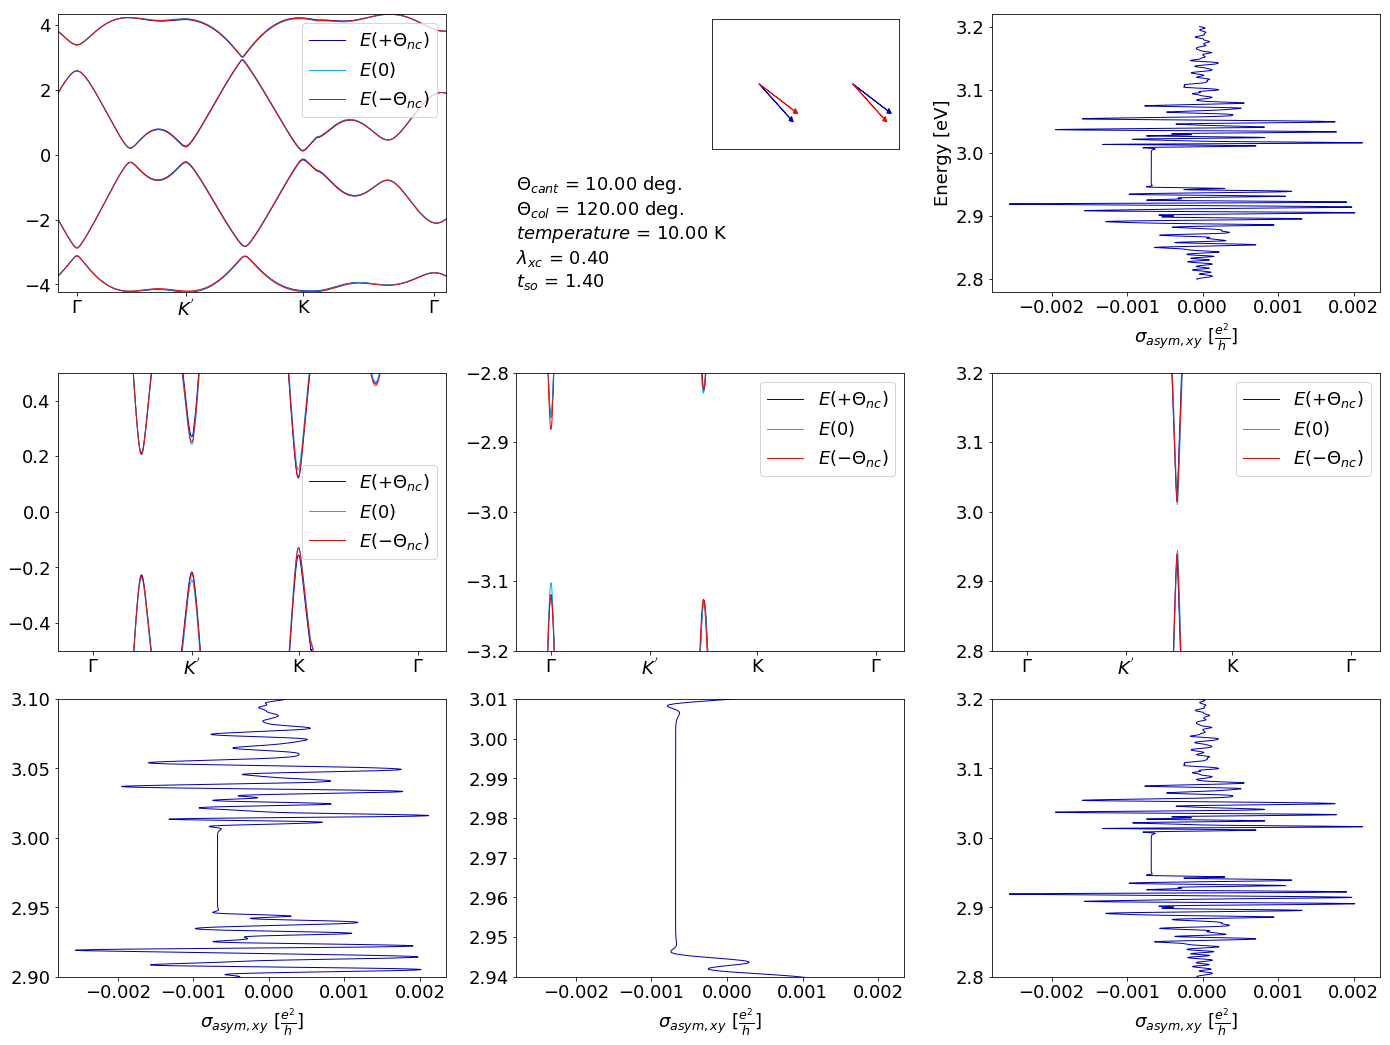

In [485]:
norm = colors.Normalize(vmin = 0, vmax = 20)
lims1 = [-0.5,0.5]
lims2 = [-3.2,-2.8]
lims3 = [2.8,3.2]
hc_lims1 = [2.9,3.1]
hc_lims2 = [2.94,3.01]
hc_lims3 = [2.8,3.2]
ticks = [118,790,1515,2324]
m,n,o = 1,6,18
#j,k,l = 
prefix2 = prefixs[1]
prefix = prefixs[6]
#inputname = "test_lambda_tso"
#inputname2 = "test_lambda_tsoflip"
#inputname_null = "test_lambda_tso_col"
#inputname_null = "path_rel_G-K-Kprime_anticol_theta_scananticol_00_lambda_02_t_so_01"
j = 5
inputname_null = "path_rel_G-K-Kprime_anticol_theta_col_{:02}".format(j)
inputname = "path_rel_G-K-Kprime_anticol_theta_scancol_{:02}".format(j)
inputname2 = "path_rel_G-K-Kprime_anticol_theta_scancolflip_{:02}".format(j)
#inputname = "path_rel_G-K-Kprime_anticol_theta_scancol_{}".format(24)
#inputname2 = "path_rel_G-K-Kprime_anticol_theta_scancol_{}".format(24)
#inputname = "path_rel_G-K-Kprime_inplane_fm_3"
#inputname2 = "path_rel_G-K-Kprime_inplane_fm_3_flip"
#inputname = "path_rel_G-K-Kprime_anticol_theta_scananticol_{:02}_lambda_{:02}_t_so_{:02}".format(j,k,l)
#inputname2 = "path_rel_G-K-Kprime_anticol_theta_scananticolflip_{:02}_lambda_{:02}_t_so_{:02}".format(j,k,l)
colmap = 'jet'
#inputname = "test_tso_lambda"
#inputname2 = "test_tso_lambdaflip"
#inputname_null = "test_tso_lambda_col"
E_sq = np.load(prefix + inputname + '/band_E.npy')
E_null_sq = np.load(prefix + inputname_null + '/band_E.npy')
E_opp_sq = np.load(prefix + inputname2 + '/band_E.npy')

E = reshape_func(3200,1600,E_sq,4)
E_null = reshape_func(3200,1600,E_null_sq,4)
E_opp = reshape_func(3200,1600,E_opp_sq,4)


hc = np.load(prefix + inputname + '/hall_cond.npy')
hc_opp = np.load(prefix + inputname2 + '/hall_cond.npy')
hc_null = np.load(prefix + inputname_null + '/hall_cond.npy')
hc_E = np.load(prefix + inputname + '/hall_cond_E.npy')

m_theta = np.load(prefix + inputname + '/m_theta.npy')
m_theta_opp = np.load(prefix + inputname2 + '/m_theta.npy')
m_theta_null = np.load(prefix + inputname_null + '/m_theta.npy')
print(m_theta,m_theta_opp,m_theta_null)
theta_col,theta_nc = col_type_func(m_theta,coltypesdict[datesets[2]])
dx = np.sin(m_theta)
dz = np.cos(m_theta)
dx_opp = np.sin(m_theta_opp)
dz_opp = np.cos(m_theta_opp)  


lmda = setup_check('lambda',prefix,inputname + '/')
lmda_null = setup_check('lambda',prefix,inputname_null + '/')
print(lmda,lmda_null)
t_so = setup_check('t_so',prefix,inputname + '/')
t_so_null = setup_check('t_so',prefix,inputname_null + '/')
print(t_so,t_so_null)
temperature = setup_check('temperature',prefix,inputname + '/')
thetastr = "$\Theta_{cant}$" + " = {:1.2f} deg.".format(theta_nc) + "\n$\Theta_{col}$" + " = {:1.2f} deg.".format(theta_col)
lambdastr = "$\lambda_{xc}$" + " = {0:1.2f}".format(lmda)
t_sostr = "$t_{so}$" + " = {0:1.2f}".format(t_so)
temperaturestr = "$temperature$" + " = {0:1.2f} K".format(temperature)
textstr = thetastr + "\n" + temperaturestr + "\n" + lambdastr + "\n" + t_sostr

npoints_E = E.shape[1]
K = np.arange(npoints_E)

        ###

fig, ax = plt.subplots(nrows = 3, ncols = 3,figsize = (3*6.4,3*4.8),constrained_layout = True)

for axes in [ax[0,0],ax[1,0],ax[1,1],ax[1,2]]:
    #axes.tick_params(labelsize = 18)
    axes.plot(K,E[0],color =cm.get_cmap(colmap)(norm(m)),label = "$E(+\Theta_{nc})$")
    axes.plot(K,E_null[0],color =cm.get_cmap(colmap)(norm(n)),label = "$E(0)$")
    axes.plot(K,E_opp[0],color =cm.get_cmap(colmap)(norm(o)),label = "$E(-\Theta_{nc})$")
#ax[0,0].legend(fontsize = 18)

ax[0,2].plot(hc_fin_func(hc,hc_opp,"antisym"),hc_E,color =cm.get_cmap(colmap)(norm(m)))
ax[2,0].plot(hc_fin_func(hc,hc_opp,"antisym"),hc_E,color =cm.get_cmap(colmap)(norm(m)))
ax[2,1].plot(hc_fin_func(hc,hc_opp,"antisym"),hc_E,color =cm.get_cmap(colmap)(norm(m)))
ax[2,2].plot(hc_fin_func(hc,hc_opp,"antisym"),hc_E,color =cm.get_cmap(colmap)(norm(m)))

ax[0,0].set_xticks(ticks)
#ax[0,0].xaxis.set_major_locator(plt.MultipleLocator(npoints_E//3))
ax[0,0].set_xticklabels(K_label[1:])
#ax[0,0].set_ylabel("Energy [eV]",fontsize = 18)
#ax[1,0].xaxis.set_major_locator(plt.MultipleLocator(npoints_E//3))
ax[1,0].set_xticks(ticks)
ax[1,0].set_xticklabels(K_label[1:])
#ax[1,0].set_ylabel("Energy [eV]",fontsize = 18)
#ax[1,1].xaxis.set_major_locator(plt.MultipleLocator(npoints_E//3))
ax[1,1].set_xticks(ticks)
ax[1,1].set_xticklabels(K_label[1:])
#ax[1,1].set_ylabel("Energy [eV]",fontsize = 18)
#ax[1,2].xaxis.set_major_locator(plt.MultipleLocator(npoints_E//3))
ax[1,2].set_xticks(ticks)
ax[1,2].set_xticklabels(K_label[1:])
#ax[1,2].set_ylabel("Energy [eV]",fontsize = 18)
ax[0,1].set_axis_off()
ax[2,0].set_ylim(hc_lims1)
ax[2,1].set_ylim(hc_lims2)
ax[2,2].set_ylim(hc_lims3)
ax[0,2].set_xlabel(symhclabeldict["antisym"],fontsize = 18)
ax[0,2].set_ylabel("Energy [eV]",fontsize = 18)
#ax[0,2].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax[0,2].tick_params(labelsize = 18)
ax[2,0].set_xlabel(symhclabeldict["antisym"],fontsize = 18)
#ax[2,0].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax[2,0].tick_params(labelsize = 18)
ax[2,1].set_xlabel(symhclabeldict["antisym"],fontsize = 18)
#ax[2,1].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax[2,1].tick_params(labelsize = 18)
ax[2,2].set_xlabel(symhclabeldict["antisym"],fontsize = 18)
#ax[2,2].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax[2,2].tick_params(labelsize = 18)

for j in range(1,4):
    for axes in [ax[0,0],ax[1,0],ax[1,1],ax[1,2]]:
        axes.plot(K,E[j],color =cm.get_cmap(colmap)(norm(m)))
        axes.plot(K,E_opp[j],color =cm.get_cmap(colmap)(norm(n)))
        axes.plot(K,E_null[j],color =cm.get_cmap(colmap)(norm(o)))
ax[0,0].margins(x=0, y=-0.0)
ax[0,0].legend(fontsize = 18)
ax[1,0].set_ylim(lims1)
ax[1,0].legend(fontsize = 18)
ax[1,1].set_ylim(lims2)
ax[1,1].legend(fontsize = 18)
ax[1,2].set_ylim(lims3)
ax[1,2].legend(fontsize = 18)
ylims = ax[0,1].get_ylim()
xlims = ax[0,1].get_xlim()
axins = inset_axes(ax[0,1], width=2.6, height=1.8,loc = 'upper right')
axins.tick_params(tick1On = False,labelleft=False, labelbottom=False)
axins.set_xlim(-1.8,2.8)
axins.set_ylim(-1.2,1.2)

axins.arrow(1.65, 0, dx[1],dz[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(m)))
axins.arrow(-0.65, 0, dx[0],dz[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(m)))
axins.arrow(1.65, 0, dx_opp[1],dz_opp[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
axins.arrow(-0.65, 0, dx_opp[0],dz_opp[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
ax[0,1].text(xlims[0], ylims[0], textstr,size = 18,
             horizontalalignment='left',
             verticalalignment='bottom')
with PdfPages(save_prefix + d + '_' + str(v) + '_' + inputname + '_' + 'bandscompare.pdf') as pdf:
    pdf.savefig(fig)

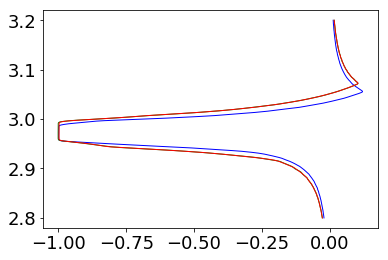

In [484]:
plt.plot(hc_null,hc_E,"b")
plt.plot(hc,hc_E,"g")
plt.plot(hc_opp,hc_E,"r")
    

((1600,), (400,), (400,))
((1600,), (400,), (400,))


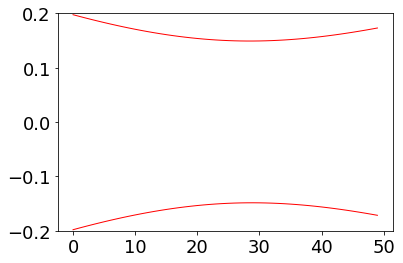

In [267]:
j = 0
inputname_null = "path_rel_G-K-Kprime_lambda_anticol_theta_col_{:02}".format(j)
E = np.load(prefixs[5]+inputname_null+"/band_E.npy")
#K = np.load(prefixs[5]+inputname_null+"/band_E.npy")
E2 = np.load(prefixs[4]+inputname_null+"/band_E.npy")
#K2 = np.load(prefixs[4]+inputname_null+"/band_E.npy")
x = np.arange(800,1600,dtype = 'int')
y = 800*np.ones(800,dtype = 'int')
x2 = 1599 - np.arange(1,401,dtype = 'int') 
y2 = 799 + 2*np.arange(1,401,dtype = 'int')
x3 = 1199 - np.arange(1,401,dtype = 'int') 
y3 = 1598 - 2*np.arange(1,401,dtype = 'int')
x = np.append(x,[x2,x3])
y = np.append(y,[y2,y3])
print(x.shape,x2.shape,x3.shape)
print(y.shape,y2.shape,y3.shape)

#[ix,iy] = np.array([x,y]).transpose()
#print(ix.shape)
ix,iy = np.meshgrid(x,y,sparse=True)
#print(ix.shape)
E = E.reshape(4,1600,1600)
K = np.linspace(0,1,1600)
K2 = np.linspace(0,1,9001)
#k_x = K[1].reshape(1600,1600,order = 'F')
#k_y = K[0].reshape(1600,1600,order = 'F')
#k_x = k_x[x,y]
#k_y = k_y[x,y]
E = E[:,y,x]
for j in range(4):
    plt.plot(E[j,600:650],"r")
    plt.ylim(-0.2,0.2)
    #plt.plot(np.linspace(0,1,3000),E2[j,6001:],"b")

(array([1.885, 1.885]), array([2.0944, 2.2689]), array([2.0944, 2.0944]))
0
((3200, 1600), (3200, 1600), (3200, 1600))
1
((3200, 1600), (3200, 1600), (3200, 1600))
2
((3200, 1600), (3200, 1600), (3200, 1600))
3
((3200, 1600), (3200, 1600), (3200, 1600))
((3200, 1600), (3200, 1600), (3200, 1600))


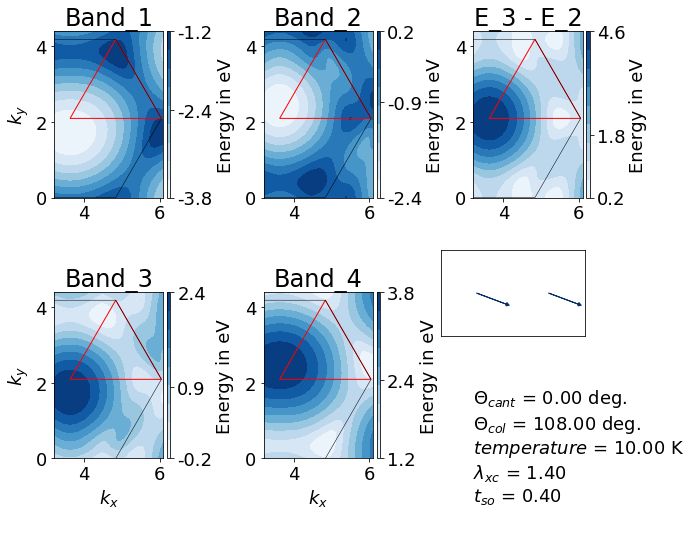

In [566]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm,ticker,colors,patches
from matplotlib.collections import LineCollection
from matplotlib.backends.backend_pdf import PdfPages
import kipp_ucvec as ucv
from datetime import date
colmap = 'Blues'
norm = colors.Normalize(vmin = -4, vmax = 4)
prefix = prefixs[6]
dateset = datesets[6]
filename = "path_rel_G-K-Kprime_lambda_anticol_theta_col_{:02}".format(4)
#filename = "path_rel_G-K-Kprime_anticol_theta_scancol_{:02}".format(2)

save_prefix = '/Users/kipp/STB/weyl_figures/Weyl_figures/'
save_fname = 'Bands_contour'
v = 0

s = date.isoformat(date.today())

E = np.load(prefix + filename + "/band_E.npy")
K = np.load(prefix + filename + "/band_k.npy")
rlat = np.load(prefix + filename + "/rez_lattice.npy")
E_shape = E.shape
K_shape = K.shape
sq_shape2 = 1600#int(np.sqrt(E_shape[1]))
sq_shape1 = 3200#int(np.sqrt(E_shape[1]))
#print(sq_shape)
E_sq = E.reshape(E_shape[0],sq_shape1,sq_shape2)
E_line = reshape_func(3200,1600,E,4)
K_line = np.arange(E_line.shape[1])

m_theta = np.load(prefix + filename + '/m_theta.npy')
#m_theta_opp = np.load(prefix + inputname2 + '/m_theta.npy')
#m_theta_null = np.load(prefix + inputname_null + '/m_theta.npy')
print(m_theta,m_theta_opp,m_theta_null)
theta_col,theta_nc = col_type_func(m_theta,coltypesdict[datesets[2]])
dx = np.sin(m_theta)
dz = np.cos(m_theta)
dx_opp = np.sin(m_theta_opp)
dz_opp = np.cos(m_theta_opp)  


k_ticks = np.linspace(0,sq_shape,5)
kx = np.linspace(min(K[0,:]),max(K[0,:]),5)
ky = np.linspace(min(K[1,:]),max(K[1,:]),5)
kx_lab = ['{:1.1f}'.format(x) for x in kx]
ky_lab = ['{:1.1f}'.format(x) for x in ky]

vx = rlat[:,0]
vy = rlat[:,1]
M_point = 0.5*vx + 0.5*vy
K_point = 1./3*vx + 2./3*vy
K_prime_point = 2./3*vx + 1./3*vy
path_verts = np.array([[0,0],K_prime_point,K_point])
path = patches.Polygon(path_verts,fill = None, edgecolor = 'k',linewidth = 0.5, linestyle = ':')

def find_node(a,b,thresh):
	mines = np.isclose(a,b,atol = thresh)
	return(mines)
weyl_node_idx = find_node(E_sq[2],E_sq[1],0.009)

def cont_plot(ax, zdata, diff = False, xdata = K[:2,:],  title ='Standardtitle',cbarlab = 'Energy in eV', axlab = 'k', x_ticks = kx,y_ticks = ky, kx_lab = kx_lab, ky_lab = ky_lab):
	sq_shape2= 1600#int(np.sqrt(E_shape[1]))
	sq_shape1= 3200#int(np.sqrt(E_shape[1]))
	E_sq = zdata.reshape(sq_shape1,sq_shape2)
	[X,Y] = xdata[:2,:].reshape(2,sq_shape1,sq_shape2)
	ax.set_aspect('equal')
	#xaxlab = '$' + axlab + '_x$'
	#yaxlab = '$' + axlab + '_y$'
	#ax.set_xlabel(xaxlab)
	#ax.set_ylabel(yaxlab)
	#ax.set_xticks(x_ticks)
	#ax.set_yticks(y_ticks)
	ax.set_title(title)
	print(X.shape,Y.shape,E_sq.shape)
	divider = make_axes_locatable(ax)
	cax = divider.append_axes("right", size="3%", pad=0.05)    
	norm = colors.Normalize(vmin = min(zdata), vmax = max(zdata))
	im3 = ax.contourf(X,Y,E_sq, cmap = cm.get_cmap(colmap),norm = norm,levels = np.linspace(min(zdata),max(zdata),10))
	cbarticks = [min(zdata),np.mean(zdata),max(zdata)]
	if diff == True:
		cbarticks.append(0.0)    
	cbarticklabels = ['{:1.1f}'.format(x) for x in cbarticks]
	cbar3 = fig.colorbar(im3,cax = cax,orientation = 'vertical',format = '%1.1f',ticks = cbarticks)
	cbar3.set_label(cbarlab)

fig,axis = plt.subplots(nrows = 2, ncols = 3,figsize = (3*6.4/2,2*4.8),constrained_layout = True)
plt.subplots_adjust(wspace = 0.8,hspace = 0.0)
inputvec = 0.5/np.cos(np.pi/6)*np.dot(ucv.R(0.5),vy)
hexcoords = ucv.hexcoords(inputvec)
axes = [axis[0,0],axis[0,1],axis[1,0],axis[1,1]]
for j in range(4):
	print(j)
	cont_plot(ax = axes[j],zdata = E[j],title = 'Band_{}'.format(j+1))
	path = patches.Polygon(path_verts + vx + vy,fill = None, edgecolor = 'r',lw = 1.0)
	axes[j].add_patch(path)
	for l in range(1,2):
		for h in range(1,2):
			hexagon = patches.Polygon(hexcoords +l*vx + h*vy ,fill = None, lw= 0.5, edgecolor = 'k')
			axes[j].add_artist(hexagon)
path = patches.Polygon(path_verts + vx + vy,fill = None, edgecolor = 'r',lw = 1.0)
axis[0,2].add_patch(path)
for l in range(1,2):
	for h in range(1,2):
		hexagon = patches.Polygon(hexcoords +l*vx + h*vy ,fill = None, lw= 0.5, edgecolor = 'k')
		axis[0,2].add_artist(hexagon)
cont_plot(ax = axis[0,2],diff = True, zdata = E[2]-E[1],title = "E_{0} - E_{1}".format(3,2))

lmda = setup_check('lambda',prefix,filename + '/')
t_so = setup_check('t_so',prefix,filename + '/')
temperature = setup_check('temperature',prefix,filename+ '/')
thetastr = "$\Theta_{cant}$" + " = {:1.2f} deg.".format(theta_nc) + "\n$\Theta_{col}$" + " = {:1.2f} deg.".format(theta_col)
lambdastr = "$\lambda_{xc}$" + " = {0:1.2f}".format(lmda)
t_sostr = "$t_{so}$" + " = {0:1.2f}".format(t_so)
temperaturestr = "$temperature$" + " = {0:1.2f} K".format(temperature)
textstr = thetastr + "\n" + temperaturestr + "\n" + lambdastr + "\n" + t_sostr

ylims = axis[1,2].get_ylim()
xlims = axis[1,2].get_xlim()
axins = inset_axes(axis[1,2], width=2.0, height=1.2,loc = 'upper right')
axins.tick_params(tick1On = False,labelleft=False, labelbottom=False)
axins.set_xlim(-1.8,2.8)
axins.set_ylim(-1.2,1.2)

axins.arrow(1.65, 0, dx[1],dz[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
axins.arrow(-0.65, 0, dx[0],dz[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
#axins.arrow(1.65, 0, dx_opp[1],dz_opp[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
#axins.arrow(-0.65, 0, dx_opp[0],dz_opp[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
axis[1,2].text(xlims[0], ylims[0], textstr,size = 18,
             horizontalalignment='left',
             verticalalignment='bottom')
axis[1,2].set_axis_off()
#axis[1,2].remove()
'''for j in range(4):
    axis[1,2].plot(E_line[j],K_line,color = cm.get_cmap(colmap)(norm(2)))
axis[1,2].set_yticks(ticks)
axis[1,2].set_yticklabels(K_label[1:])
axis[1,2].set_title("Bands on path")
axis[1,2].set_xlabel("Energy in eV")'''
axis[1,0].set_xlabel("$k_x$")
axis[1,1].set_xlabel("$k_x$")
axis[0,0].set_ylabel("$k_y$")
axis[1,0].set_ylabel("$k_y$")
with PdfPages(save_prefix + d + '_' + dateset + '_' + filename + '_' + save_fname + '.pdf') as pdf:
	pdf.savefig(fig)

In [323]:
x = np.arange(0,1599,2,dtype = 'int')
y = 1599*np.ones(800,dtype = 'int')
x2 = 1599 - np.arange(1,801,dtype = 'int') 
y2 = 1599 + 2*np.arange(1,801,dtype = 'int')
x3 = 800 - np.arange(1,801,dtype = 'int') 
y3 = 3198 - 2*np.arange(1,801,dtype = 'int')
print(x[0],x[-1],x2[0],x2[-1],x3[0],x3[-1])
print(y[0],y[-1],y2[0],y2[-1],y3[0],y3[-1])
x = np.append(x,[x2,x3])
y = np.append(y,[y2,y3])

[0, 1, 11]


In [531]:
E_line.shape

(4, 2400)

(0, 1598, 1598, 799, 799, 0)
(1599, 1599, 1601, 3199, 3196, 1598)
((2400,), (800,), (800,))
((2400,), (800,), (800,))
[ 118  617  799 1156 1862 2324]
[ 448  790 1515 1600 2036]


'\nfor p in peaks2:\n    axis[1].axvline(p)'

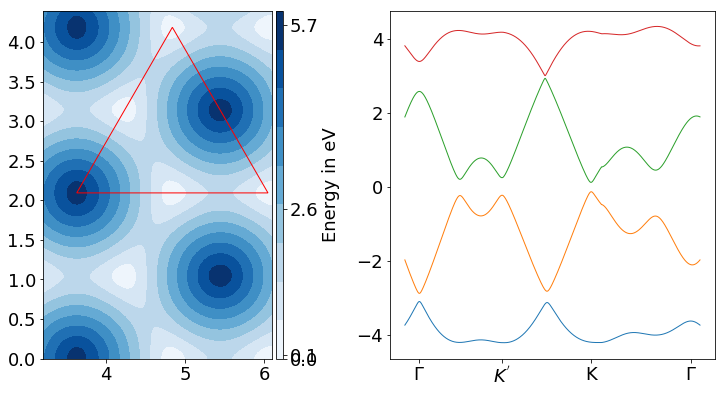

In [467]:
        ### ONLY DIFF BAND 2 AND 3 ###
from mpl_toolkits.axes_grid1 import make_axes_locatable
def cont_plot(ax, zdata, xdata = K[:2,:],  title ='Standardtitle',cbarlab = 'Energy in eV', axlab = 'k', x_ticks = kx,y_ticks = ky, kx_lab = kx_lab, ky_lab = ky_lab,grain = 10):
    sq_shape2 = 1600#int(np.sqrt(E_shape[1]))
    sq_shape1 = 3200#int(np.sqrt(E_shape[1]))
    E_sq = zdata.reshape(sq_shape1,sq_shape2)
    [X,Y] = xdata[:2,:].reshape(2,sq_shape1,sq_shape2)
    ax.set_aspect('equal')
    #xaxlab = '$' + axlab + '_x$'
    #yaxlab = '$' + axlab + '_y$'
    #ax.set_xlabel(xaxlab)
    #ax.set_ylabel(yaxlab)
    #ax.set_xticks(x_ticks)
    #ax.set_yticks(y_ticks)
    #ax.set_title(title)
    #print(X.shape,Y.shape,E_sq.shape)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    norm = colors.Normalize(vmin = min(zdata), vmax = max(zdata))
    im3 = ax.contourf(X,Y,E_sq, cmap = cm.get_cmap(colmap),norm = norm,levels = np.linspace(0,6,grain))
    cbarticks = [min(zdata),0.0,np.mean(zdata),max(zdata)]
    #cbarticklabels = ['{:1.1f}'.format(x) for x in cbarticks]
    cbar3 = fig.colorbar(im3,cax = cax,orientation = 'vertical',format = '%1.1f',ticks = cbarticks)
    cbar3.set_label(cbarlab)



E_diff = E[2]-E[1]

x = np.arange(0,1599,2,dtype = 'int')
y = 1599*np.ones(800,dtype = 'int')
x2 = 1599 - np.arange(1,801,dtype = 'int') 
y2 = 1599 + 2*np.arange(1,801,dtype = 'int')
x3 = 800 - np.arange(1,801,dtype = 'int') 
y3 = 3198 - 2*np.arange(1,801,dtype = 'int')
print(x[0],x[-1],x2[0],x2[-1],x3[0],x3[-1])
print(y[0],y[-1],y2[0],y2[-1],y3[0],y3[-1])
x = np.append(x,[x2,x3])
y = np.append(y,[y2,y3])
print(x.shape,x2.shape,x3.shape)
print(y.shape,y2.shape,y3.shape)
#print(x2[[0,-1]])
ix,iy = np.meshgrid(x,y,sparse=True)
# = E.reshape(4,1600,3200)
K_line = np.linspace(0,1,2400)
E_line = E_sq[:,y,x]
#E_line = np.append(E_sq[:,y,x],[E_sq[:,y2,x2],E_sq[:,y3,x3]])

peaks2,props = find_peaks(E_line[1])
peaks,props = find_peaks(E_line[0])
print(peaks)
print(peaks2)
#ticks = [peaks[0],peaks[2],2399,peaks[-1]]
ticks = [118,790,1515,2324]
colmap = 'Blues'
norm = colors.Normalize(vmin = min(E_diff), vmax = max(E_diff))
fig,axis = plt.subplots(ncols = 2,figsize = (2*6.4,6.4))
path = patches.Polygon(path_verts + vx + vy,fill = None, edgecolor = 'r',lw = 1.0)
axis[0].add_patch(path)
cont_plot(ax = axis[0],zdata = E_diff,title = "E_{0} - E_{1}".format(3,2),grain = 10)
#cont_plot(ax = axis[1],zdata = E_diff,title = "E_{0} - E_{1}".format(3,2),grain = 20)
axis[1].set_xticks(ticks)
axis[1].set_xticklabels(K_label[1:])
#axis[1].set_ylim(-3.25,-2.75)
for j in range(4):
    axis[1].plot(E_line[j])

'''
for p in peaks2:
    axis[1].axvline(p)'''

In [148]:
x = np.arange(0,1599,2,dtype = 'int')
y = 1599*np.ones(800,dtype = 'int')
x2 = 1599 - np.arange(1,801,dtype = 'int') 
y2 = 1599 + 2*np.arange(1,801,dtype = 'int')
x3 = 800 - np.arange(1,801,dtype = 'int') 
y3 = 3198 - 2*np.arange(1,801,dtype = 'int')
print(x[0],x[-1],x2[0],x2[-1],x3[0],x3[-1])
print(y[0],y[-1],y2[0],y2[-1],y3[0],y3[-1])
x = np.append(x,[x2,x3])
y = np.append(y,[y2,y3])
E_sq = E.reshape(E_shape[0],sq_shape1,sq_shape2)
E_line = E_sq[:,y,x]

array([ 90.00021046, 121.41548637])

In [150]:
for j in range(6):
    inputname_null = "path_rel_G-K-Kprime_anticol_theta_scancol_{:02}".format(j)
    m_theta_null = np.load(prefix + inputname_null + '/m_theta.npy')
    print(m_theta_null*180/np.pi)

[91.41541621 60.00014031]
[97.41428433 65.99900842]
[103.41315244  71.99787654]
[109.41775014  78.00247423]
[115.41661825  84.00134234]
[121.41548637  90.00021046]


1.2247448713915892